In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.width", 200)


In [4]:
DATA_PATH = "//content//drive//MyDrive//churn//data//raw//WA_Fn-UseC_-Telco-Customer-Churn.csv"

df = pd.read_csv(DATA_PATH)

print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (7032, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [6]:
df.describe(include="all").T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7032,7032,3186-AJIEK,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7032,2,Male,3549,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7032.0,NaN,NaN,NaN,0.1624,0.368844,0.0,0.0,0.0,0.0,1.0
Partner,7032,2,No,3639,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7032,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7032.0,NaN,NaN,NaN,32.421786,24.54526,1.0,9.0,29.0,55.0,72.0
PhoneService,7032,2,Yes,6352,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7032,3,No,3385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7032,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7032,3,No,3497,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Duplicate check
print("Duplicate rows:", df.duplicated().sum())

# Missing values
df.isnull().sum()


Duplicate rows: 0


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [8]:
df["Churn"].value_counts()


,count
Churn,
No,5163
Yes,1869


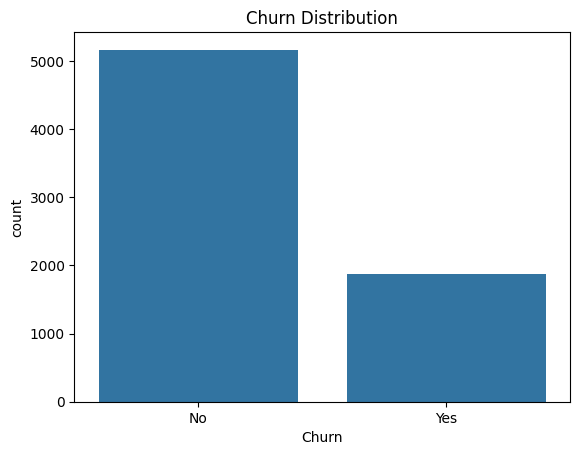

In [9]:
sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.show()


In [10]:
# Convert to numeric (strings → NaN)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Fill missing values with median
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


/tmp/ipython-input-1056348656.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


In [14]:
df.drop(columns=["customerID"], inplace=True)


In [15]:
binary_columns = [
    "Partner", "Dependents", "PhoneService",
    "PaperlessBilling", "Churn"
]

for col in binary_columns:
    df[col] = df[col].map({"Yes": 1, "No": 0})


In [16]:
df["gender"] = df["gender"].map({"Male": 1, "Female": 0})


In [17]:
service_columns = [
    "MultipleLines", "OnlineSecurity", "OnlineBackup",
    "DeviceProtection", "TechSupport",
    "StreamingTV", "StreamingMovies"
]

for col in service_columns:
    df[col] = df[col].replace({
        "No internet service": "No",
        "No phone service": "No"
    })


In [18]:
categorical_cols = df.select_dtypes(include="object").columns
print("Categorical Columns:", categorical_cols.tolist())

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


Categorical Columns: ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']


In [19]:
for col in df.columns:
    df[col] = df[col].astype(int)


In [20]:
# Check data types
df.dtypes


,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
PaperlessBilling,int64
MonthlyCharges,int64
TotalCharges,int64
Churn,int64


In [21]:
# Confirm no missing values
df.isnull().sum().sum()


np.int64(0)

In [22]:
# Preview cleaned data
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29,29,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56,1889,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,53,108,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42,1840,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0
4,0,0,0,0,2,1,1,70,151,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0


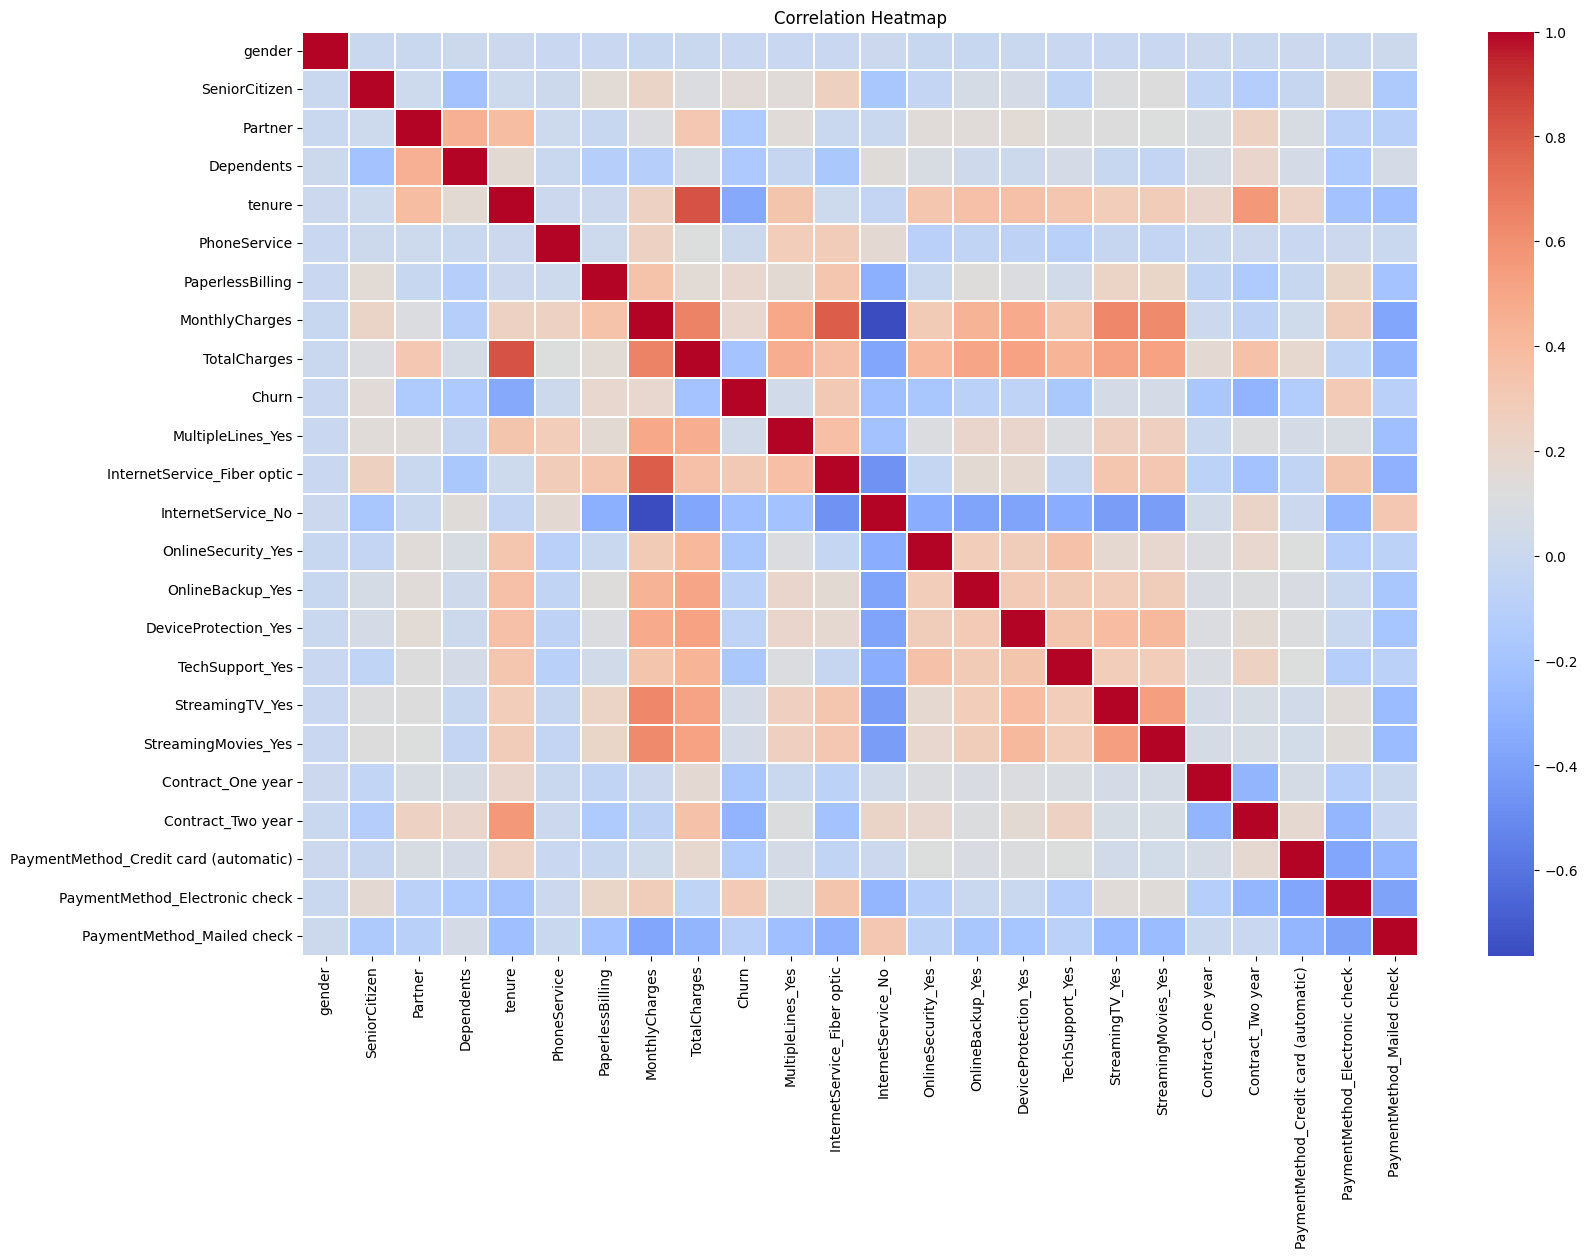

In [23]:
plt.figure(figsize=(18, 12))
sns.heatmap(df.corr(), cmap="coolwarm", linewidths=0.3)
plt.title("Correlation Heatmap")
plt.show()


In [24]:
OUTPUT_PATH = "//content//drive//MyDrive//churn//data//processed//churn_cleaned_integer_ready.csv"

df.to_csv(OUTPUT_PATH, index=False)

print("Cleaned dataset saved successfully at:")
print(OUTPUT_PATH)


Cleaned dataset saved successfully at:
//content//drive//MyDrive//churn//data//processed//churn_cleaned_integer_ready.csv
